<a href="https://colab.research.google.com/github/safriyamrn/EmotionAnalysis-NRCEmotionLexicon/blob/main/Analisis_Emosi_Luqman_Inggris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Unduh resource NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/Dataset Skripsi/en.ahmedali (1).txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []
for line in lines:
    parts = line.strip().split("|")
    if len(parts) == 3:
        surah, ayat, teks = parts
        data.append([int(surah), int(ayat), teks])

df = pd.DataFrame(data, columns=["Surah", "Ayat", "Terjemahan"])

# untuk mengambil hanya Surah Luqman (Surah ke-31)
luqman = df[df["Surah"] == 31].reset_index(drop=True)
luqman.to_csv("/content/luqman_inggris.csv", index=False)
luqman

,Surah,Ayat,Terjemahan
0,31,1,ALIF LAM MIM.
1,31,2,"These are the verses of the sagacious Book,"
2,31,3,"And a guidance and grace for those who do good,"
3,31,4,"Who are constant in devotion, pay the zakat, a..."
4,31,5,"They are on guidance from their Lord, and will..."
5,31,6,But among men are also those who spread frivol...
6,31,7,When Our verses are recited before them they t...
7,31,8,Surely for those who believe and do the right ...
8,31,9,They will abide in them for ever. The promise ...
9,31,10,"He created the skies without a support, as you..."


In [ ]:
# === 2. Definisi fungsi preprocessing ===
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # ubah ke huruf kecil
    text = text.lower()

    # hapus tanda baca, angka, simbol
    text = re.sub(r'[^a-z\s]', '', text)

    # tokenisasi
    tokens = word_tokenize(text)

    # hapus stopwords
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    # lemmatisasi (ubah ke bentuk dasar)
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return tokens

In [ ]:
# === 3. Terapkan preprocessing ===
luqman['Tokens'] = luqman['Terjemahan'].apply(preprocess_text)
luqman

,Surah,Ayat,Terjemahan,Tokens
0,31,1,ALIF LAM MIM.,"[alif, lam, mim]"
1,31,2,"These are the verses of the sagacious Book,","[verse, sagacious, book]"
2,31,3,"And a guidance and grace for those who do good,","[guidance, grace, good]"
3,31,4,"Who are constant in devotion, pay the zakat, a...","[constant, devotion, pay, zakat, certain, here..."
4,31,5,"They are on guidance from their Lord, and will...","[guidance, lord, prosper]"
5,31,6,But among men are also those who spread frivol...,"[among, men, also, spread, frivolous, story, m..."
6,31,7,When Our verses are recited before them they t...,"[verse, recited, turn, away, haughtily, though..."
7,31,8,Surely for those who believe and do the right ...,"[surely, believe, right, pleasure, garden]"
8,31,9,They will abide in them for ever. The promise ...,"[abide, ever, promise, god, true, allmighty, a..."
9,31,10,"He created the skies without a support, as you...","[created, sky, without, support, see, placed, ..."


In [ ]:
# === 2. Load Lexicon NRC EmoLex Indonesia ===
lexicon_path = pd.read_csv("/content/drive/MyDrive/Dataset Skripsi/Indonesian-NRC-EmoLex.txt", sep='\t')

# Pastikan kolom yang dipakai (English Word + 8 emosi)
# Jika file kamu juga punya kolom 'positive' dan 'negative', ini otomatis terdeteksi
emotion_cols = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']
extra_sentiment_cols = [c for c in ['positive','negative'] if c in lexicon_path.columns]

selected_cols = ['English Word'] + emotion_cols + extra_sentiment_cols
lexicon_df = lexicon_path[selected_cols]
lexicon_df.columns = ['word'] + emotion_cols + extra_sentiment_cols

In [ ]:
# Konversi ke dictionary
lexicon = {}
for _, row in lexicon_df.iterrows():
    lexicon[row['word']] = row.to_dict()

In [ ]:
# === 3. Hitung Emosi & Sentimen per Kalimat ===
from collections import Counter

# Ensure the 'Tokens' column is created before use
luqman['Tokens'] = luqman['Terjemahan'].apply(preprocess_text)

records = []

for _, row in luqman.iterrows():
    tokens = row['Tokens']
    word_score = {}
    pos_count = neg_count = 0
    emo_counter = Counter()

    for tok in tokens:
        if tok in lexicon:
            # Hitung emosi
            for emo in emotion_cols:
                if lexicon[tok][emo] == 1:
                    emo_counter[emo] += 1

            # Hitung positif / negatif (jika ada)
            if 'positive' in lexicon[tok] and 'negative' in lexicon[tok]:
                pos_count += lexicon[tok]['positive']
                neg_count += lexicon[tok]['negative']
                word_score[tok] = lexicon[tok]['positive'] - lexicon[tok]['negative']
            else:
                word_score[tok] = 0
        else:
            word_score[tok] = 0

    # Tentukan label sentimen
    if pos_count > neg_count:
        sentiment = "Positive"
    elif neg_count > pos_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Simpan hasil per ayat/baris
    records.append({
        "Ayat": row.get('Ayat', None),
        "Terjemahan": row.get('Terjemahan', None),
        "Skor Sentimen per kata": word_score,
        "Positif": pos_count,
        "Negatif": neg_count,
        "Total": pos_count - neg_count,
        "Sentimen": sentiment,
        **{emo: emo_counter[emo] for emo in emotion_cols}
    })


In [ ]:
# === 4. Buat DataFrame hasil ===
result_df = pd.DataFrame(records)
display(result_df.head(25))

# Simpan ke CSV
result_df.to_csv("/content/luqman_sentiment_emotion_eng.csv", index=False)
print("Hasil disimpan ke /content/luqman_sentiment_emotion_eng.csv")

,Ayat,Terjemahan,Skor Sentimen per kata,Positif,Negatif,Total,Sentimen,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1,ALIF LAM MIM.,"{'alif': 0, 'lam': 0, 'mim': 0}",0,0,0,Neutral,0,0,0,0,0,0,0,0
1,2,"These are the verses of the sagacious Book,","{'verse': 0, 'sagacious': 0, 'book': 0}",0,0,0,Neutral,0,0,0,0,0,0,0,0
2,3,"And a guidance and grace for those who do good,","{'guidance': 1, 'grace': 1, 'good': 1}",3,0,3,Positive,0,1,0,0,1,0,1,2
3,4,"Who are constant in devotion, pay the zakat, a...","{'constant': 1, 'devotion': 0, 'pay': 1, 'zaka...",2,0,2,Positive,0,1,0,0,1,0,0,2
4,5,"They are on guidance from their Lord, and will...","{'guidance': 1, 'lord': 0, 'prosper': 1}",3,1,2,Positive,0,1,1,0,1,0,0,2
5,6,But among men are also those who spread frivol...,"{'among': 0, 'men': 0, 'also': 0, 'spread': 0,...",2,3,-1,Negative,1,1,0,2,1,1,0,2
6,7,When Our verses are recited before them they t...,"{'verse': 0, 'recited': 0, 'turn': 0, 'away': ...",0,2,-2,Negative,1,0,1,1,0,1,0,0
7,8,Surely for those who believe and do the right ...,"{'surely': 0, 'believe': 0, 'right': 0, 'pleas...",1,0,1,Positive,0,0,0,0,1,0,0,0
8,9,They will abide in them for ever. The promise ...,"{'abide': 0, 'ever': 0, 'promise': 1, 'god': 1...",3,0,3,Positive,0,1,0,1,3,0,0,3
9,10,"He created the skies without a support, as you...","{'created': 0, 'sky': 1, 'without': 0, 'suppor...",5,1,4,Positive,0,0,1,1,2,0,1,1


Hasil disimpan ke /content/luqman_sentiment_emotion_eng.csv


In [ ]:
emosi_only = ['anger','anticipation','disgust','fear',
              'joy','sadness','surprise','trust']

records_emosi = []

for _, row in luqman.iterrows():
    tokens = row['Tokens']
    emo_counter = Counter()
    per_word_score = {}

    for tok in tokens:
        if tok in lexicon:
            # ambil seluruh skor emosi kata ini
            word_scores = {emo: lexicon[tok][emo] for emo in emosi_only}
            per_word_score[tok] = word_scores

            # tambahkan ke counter total per ayat
            for emo, val in word_scores.items():
                if val == 1:
                    emo_counter[emo] += 1
        else:
            # kata tidak ada di lexicon -> semua emosi 0
            per_word_score[tok] = {emo:0 for emo in emosi_only}

    # emosi dominan per ayat
    dominant_emo = max(emo_counter, key=emo_counter.get) if emo_counter else "none"

    records_emosi.append({
        "Ayat"          : row["Ayat"],
        "Terjemahan"    : row["Terjemahan"],
        "Tokens"        : tokens,
        "Skor Emosi per Kata" : per_word_score,
        "Emosi Dominan" : dominant_emo,
        **{emo: emo_counter[emo] for emo in emosi_only}
    })

emosi_df = pd.DataFrame(records_emosi)

In [ ]:
pd.set_option('display.max_colwidth', None)
emosi_df[['Ayat','Terjemahan', 'Tokens','Skor Emosi per Kata', 'Emosi Dominan']].head(35)

,Ayat,Terjemahan,Tokens,Skor Emosi per Kata,Emosi Dominan
0,1,ALIF LAM MIM.,"[alif, lam, mim]","{'alif': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'lam': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'mim': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}}",none
1,2,"These are the verses of the sagacious Book,","[verse, sagacious, book]","{'verse': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'sagacious': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'book': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}}",none
2,3,"And a guidance and grace for those who do good,","[guidance, grace, good]","{'guidance': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'grace': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'good': {'anger': 0, 'anticipation': 1, 'disgust': 0, 'fear': 0, 'joy': 1, 'sadness': 0, 'surprise': 1, 'trust': 1}}",trust
3,4,"Who are constant in devotion, pay the zakat, and are certain of the Hereafter.","[constant, devotion, pay, zakat, certain, hereafter]","{'constant': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'devotion': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'pay': {'anger': 0, 'anticipation': 1, 'disgust': 0, 'fear': 0, 'joy': 1, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'zakat': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'certain': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'hereafter': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}}",trust
4,5,"They are on guidance from their Lord, and will prosper.","[guidance, lord, prosper]","{'guidance': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'lord': {'anger': 0, 'anticipation': 0, 'disgust': 1, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'prosper': {'anger': 0, 'anticipation': 1, 'disgust': 0, 'fear': 0, 'joy': 1, 'sadness': 0, 'surprise': 0, 'trust': 0}}",trust
5,6,"But among men are also those who spread frivolous stories to mislead (others) from the way of God, without any knowledge, and take it lightly. For such as these the nemesis will be shameful.","[among, men, also, spread, frivolous, story, mislead, others, way, god, without, knowledge, take, lightly, nemesis, shameful]","{'among': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'men': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'also': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'spread': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'frivolous': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'story': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'mislead': {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 1, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'others': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'way': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 

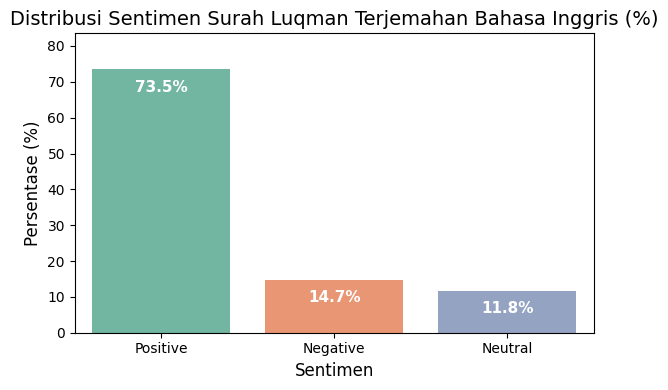

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sent_pct = result_df['Sentimen'].value_counts(normalize=True) * 100
sent_df  = sent_pct.reset_index()
sent_df.columns = ['Sentimen','Persentase']

plt.figure(figsize=(6,4))
sns.barplot(
    data=sent_df,
    x='Sentimen',
    y='Persentase',
    hue='Sentimen',
    palette='Set2',
    legend=False
)

plt.title("Distribusi Sentimen Surah Luqman Terjemahan Bahasa Inggris (%)", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)

plt.ylim(0, sent_df['Persentase'].max() + 10)
for i, v in enumerate(sent_df['Persentase']):
    plt.text(i, v - 5, f"{v:.1f}%", ha='center', va='center', color='white', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

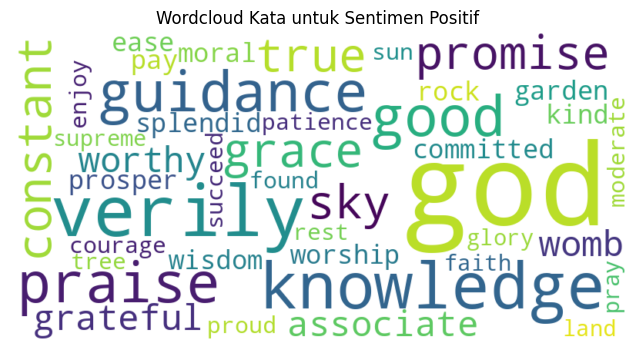

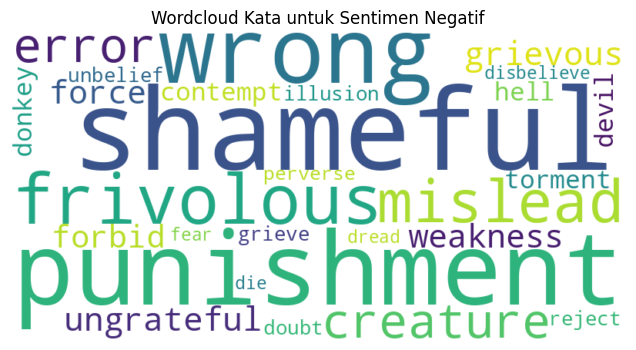

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_words_counter = Counter()
negative_words_counter = Counter()

for _, row in result_df.iterrows():
    for word, score in row['Skor Sentimen per kata'].items():
        if score > 0:
            positive_words_counter[word] += 1
        elif score < 0:
            negative_words_counter[word] += 1

# Wordcloud for Positive Sentiment
if positive_words_counter:
    wordcloud_positive = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=True
    ).generate_from_frequencies(positive_words_counter)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis("off")
    plt.title("Wordcloud Kata untuk Sentimen Positif")
    plt.show()
else:
    print("Tidak ada kata dengan sentimen positif yang ditemukan.")

# Wordcloud for Negative Sentiment
if negative_words_counter:
    wordcloud_negative = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=True
    ).generate_from_frequencies(negative_words_counter)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud_negative, interpolation="bilinear")
    plt.axis("off")
    plt.title("Wordcloud Kata untuk Sentimen Negatif")
    plt.show()
else:
    print("Tidak ada kata dengan sentimen negatif yang ditemukan.")

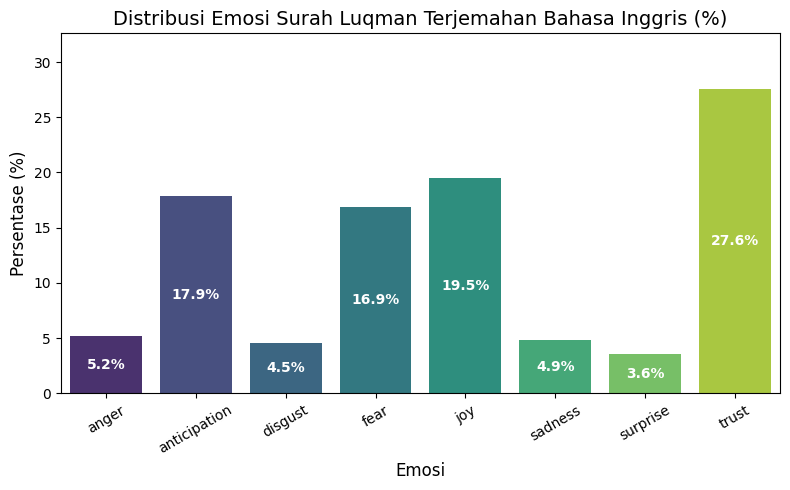

In [ ]:
# Ambil hanya 8 emosi
emosi_only = ['anger','anticipation','disgust','fear',
              'joy','sadness','surprise','trust']


total_emosi = result_df[emosi_only].sum()
persentase_emosi = total_emosi / total_emosi.sum() * 100
emosi_df = persentase_emosi.reset_index()
emosi_df.columns = ['Emosi', 'Persentase']

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=emosi_df,
    x='Emosi',
    y='Persentase',
    hue='Emosi',
    palette='viridis',
    legend=False
)
plt.ylim(0, emosi_df['Persentase'].max() + 5)
for i, v in enumerate(emosi_df['Persentase']):
    ax.text(i, v/2, f"{v:.1f}%", ha='center', va='center',
            color='white', fontsize=10, fontweight='bold')

plt.title("Distribusi Emosi Surah Luqman Terjemahan Bahasa Inggris (%)", fontsize=14)
plt.xlabel("Emosi", fontsize=12)
plt.ylabel("Persentase (%)", fontsize=12)
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

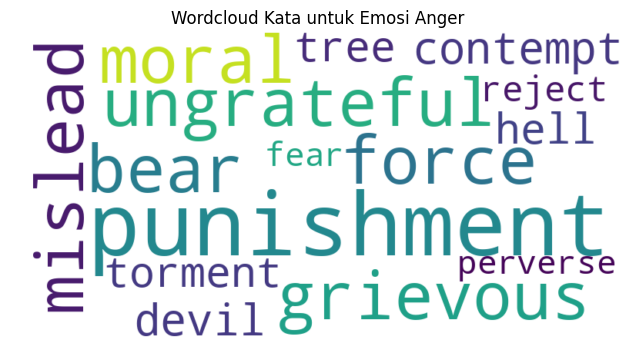

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["anger"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

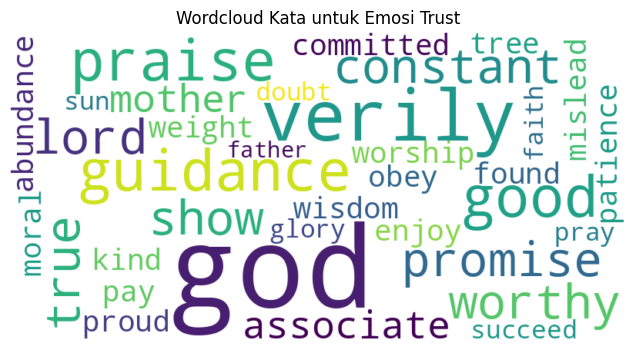

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["trust"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

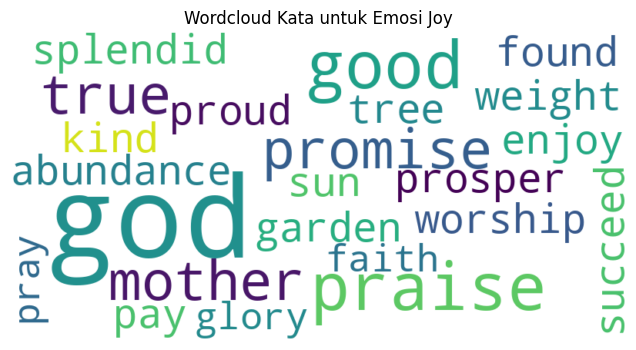

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["joy"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

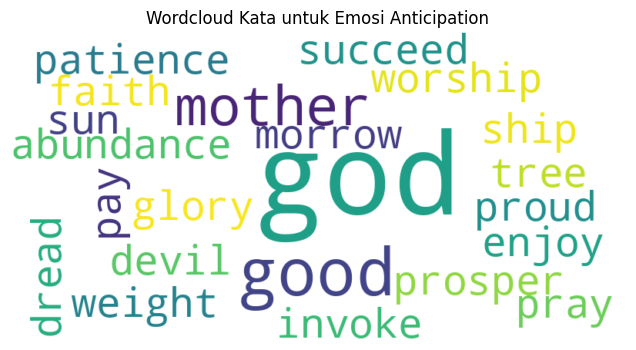

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["anticipation"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

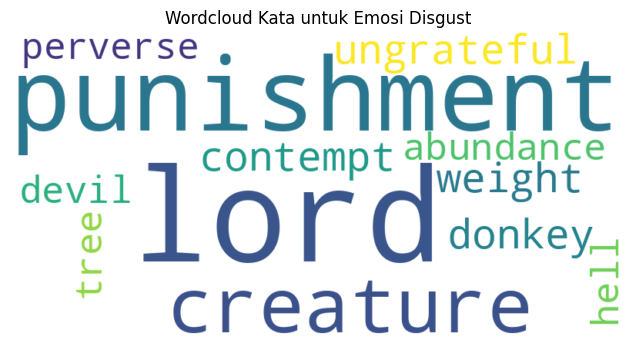

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["disgust"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

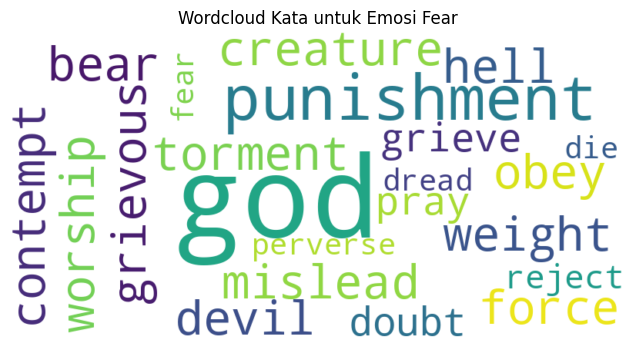

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["fear"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

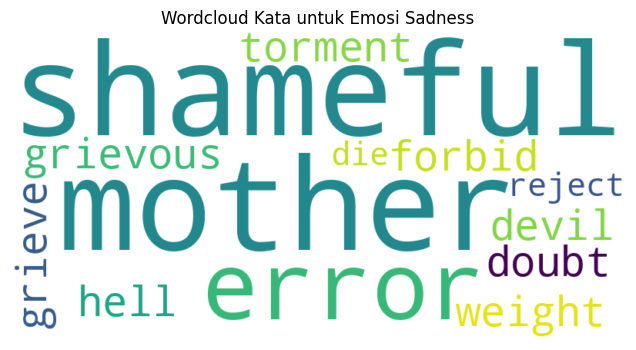

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["sadness"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

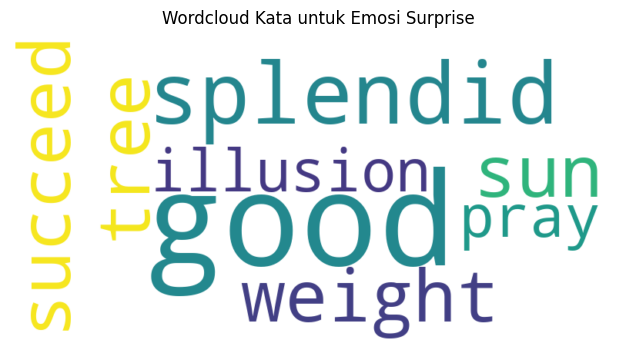

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcount_emosi = {}
for e in ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']:
    words = []
    for _, row in result_df.iterrows():
        for w, val in row['Skor Sentimen per kata'].items():
            if w in lexicon and lexicon[w].get(e,0) == 1:
                words.append(w)
    wordcount_emosi[e] = Counter(words)

for emo in ["surprise"]:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        # warna merah untuk emosi marah
        collocations=True
    ).generate_from_frequencies(wordcount_emosi[emo])

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Kata untuk Emosi {emo.capitalize()}")
    plt.show()

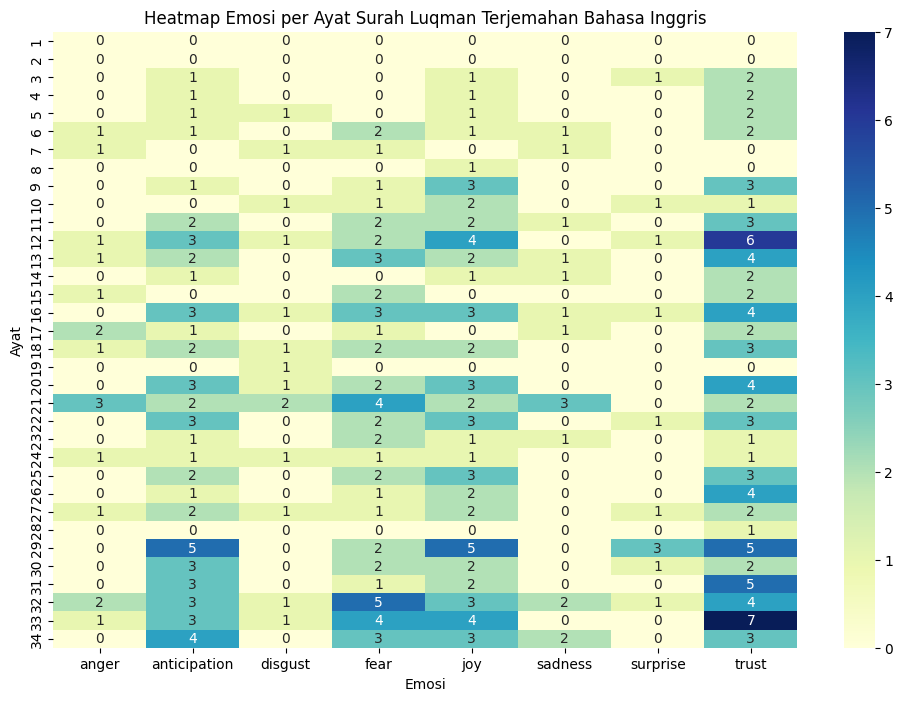

In [ ]:
# 8. Heatmap Emosi per Ayat
plt.figure(figsize=(12,8))
sns.heatmap(result_df.set_index("Ayat")[['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']], annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap Emosi per Ayat Surah Luqman Terjemahan Bahasa Inggris")
plt.xlabel("Emosi")
plt.ylabel("Ayat")
plt.show()